In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
import chardet
file = 'top50.csv'
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

In [3]:
data = pd.read_csv('top50.csv',encoding = 'Windows-1252')

In [4]:
data

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [6]:
data = data.drop('Unnamed: 0',axis = 1)

# Data Visualization

In [7]:
import seaborn as sns

In [9]:
sns.set_style('whitegrid')

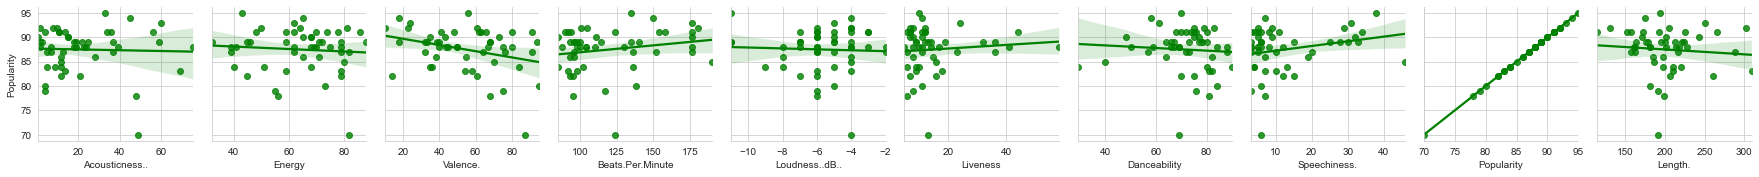

In [18]:
x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre']))
g = sns.PairGrid(data, y_vars=["Popularity"], x_vars=x_axis)
g.map(sns.regplot,color='g')
plt.savefig('C:\\Users\\Mario\\Downloads\\spotify popular 2019\\graph\\allParamPopular.png',dpi=300)

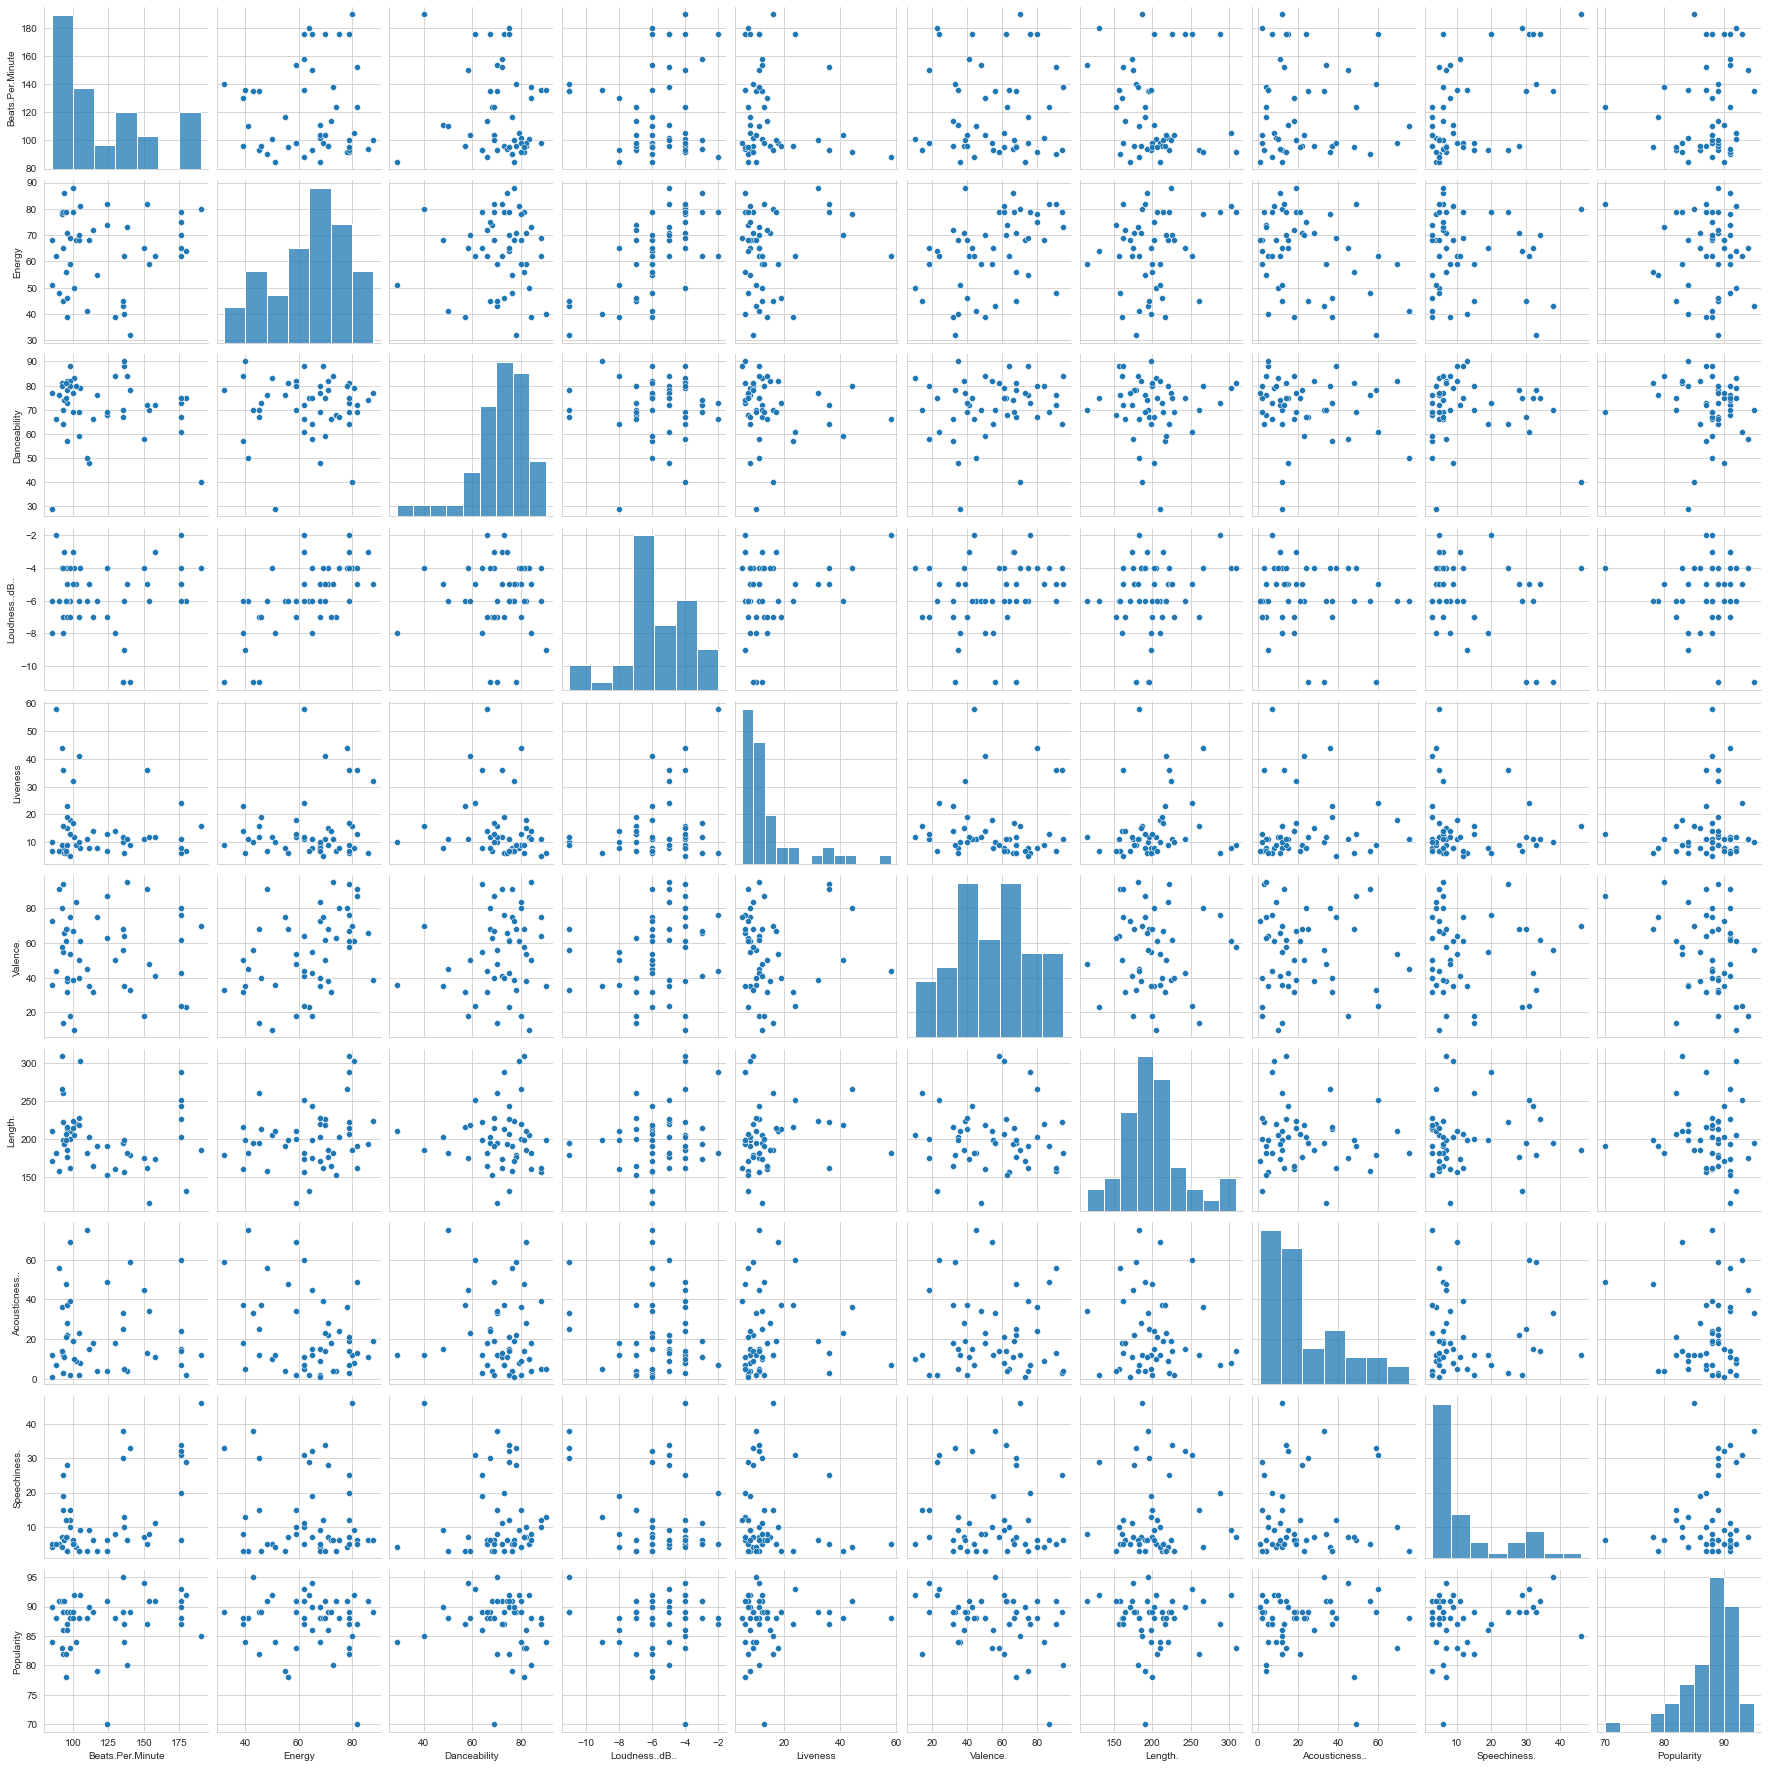

In [24]:
sns.pairplot(data)
plt.savefig('C:\\Users\\Mario\\Downloads\\spotify popular 2019\\graph',dpi=300)

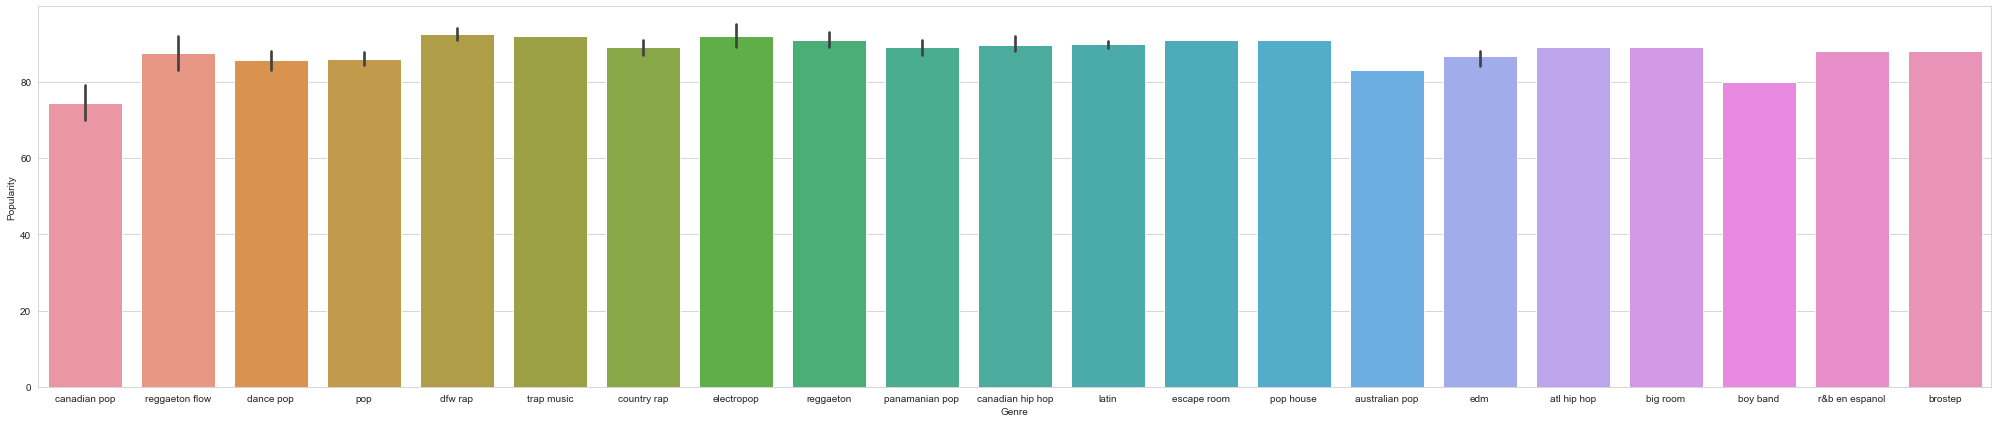

In [20]:
plt.figure(figsize=(35,7))
g1=sns.barplot(x="Genre", y="Popularity", data=data)
plt.savefig('C:\\Users\\Mario\\Downloads\\spotify popular 2019\\graph\\genrePopular.png',dpi=300)

In [21]:
#filtering maximum values of Genre

genrePop = {}
for idx,gp in (data[['Genre','Popularity']]).iterrows():
    if str(gp['Genre']) not in genrePop:
        genrePop[str(gp['Genre'])] = gp['Popularity']
    elif str(gp['Genre']) in genrePop:
        if gp['Popularity'] > genrePop[str(gp['Genre'])]:
            genrePop[str(gp['Genre'])] = gp['Popularity']

print(genrePop)

{'canadian pop': 79, 'reggaeton flow': 92, 'dance pop': 90, 'pop': 90, 'dfw rap': 94, 'trap music': 92, 'country rap': 91, 'electropop': 95, 'reggaeton': 93, 'panamanian pop': 91, 'canadian hip hop': 92, 'latin': 91, 'escape room': 91, 'pop house': 91, 'australian pop': 83, 'edm': 88, 'atl hip hop': 89, 'big room': 89, 'boy band': 80, 'r&b en espanol': 88, 'brostep': 88}


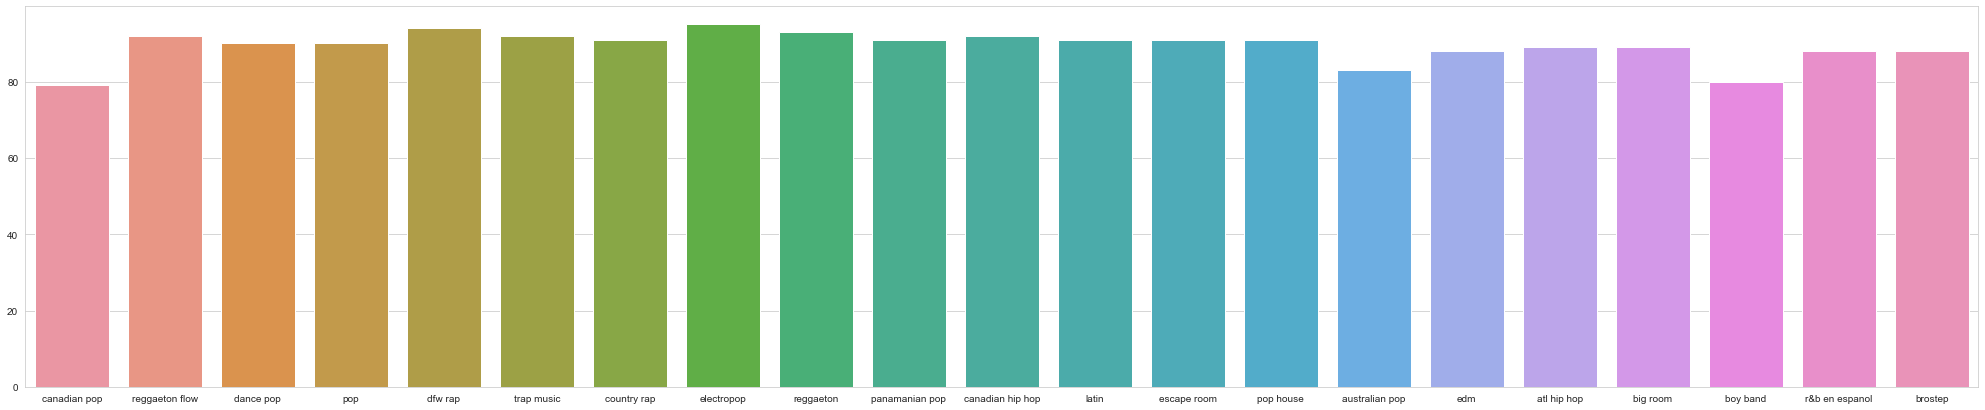

In [25]:
#showing highest value of popularity against genre

plt.figure(figsize=(35,7))
LoK = list(genrePop.keys())
LoV = list(genrePop.values())
sns.barplot(x=LoK,y=LoV)
plt.savefig('C:\\Users\\Mario\\Downloads\\spotify popular 2019\\graph\\MaxGenrePopular.png',dpi=300)

# Cek Multikolinear

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
X_variables = data.drop(['Track.Name','Artist.Name','Genre'],axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = X_variables.columns
vif_data["VIF"] = [variance_inflation_factor(X_variables.values, i) for i in range(len(X_variables.columns))]

In [27]:
vif_data[['feature','VIF']]

,feature,VIF
0,Beats.Per.Minute,26.349449
1,Energy,50.699749
2,Danceability,38.862837
3,Loudness..dB..,16.132459
4,Liveness,3.258390
5,Valence.,10.069790
6,Length.,29.298301
7,Acousticness..,2.723447
8,Speechiness.,3.727015
9,Popularity,149.687568


# Cek korefisien korelasi

In [33]:
from sklearn.metrics import r2_score

x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre','Liveness','Acousticness..',
                              'Speechiness.','Popularity']))

for i in x_axis:
    coefficient_of_dermination = r2_score(data[i], data['Popularity'])
    print(i,'vs Popularity: ',coefficient_of_dermination)

Energy vs Popularity:  -2.91825745958113
Valence. vs Popularity:  -2.3821075022498572
Beats.Per.Minute vs Popularity:  -1.0972270259478138
Loudness..dB.. vs Popularity:  -2099.057909468198
Danceability vs Popularity:  -2.058599496972947
Length. vs Popularity:  -8.606256905974325


In [34]:
x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre','Liveness','Acousticness..',
                              'Speechiness.','Energy']))

for i in x_axis:
    coefficient_of_dermination = r2_score(data[i], data['Energy'])
    print(i,'vs Energy: ',coefficient_of_dermination)

Valence. vs Energy:  -0.029820829583572017
Beats.Per.Minute vs Energy:  -3.52364879452733
Loudness..dB.. vs Energy:  -1211.4891419747128
Danceability vs Energy:  -1.7637809050471907
Popularity vs Energy:  -38.34041476985331
Length. vs Energy:  -12.449921097411929


In [35]:
x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre','Liveness','Acousticness..',
                              'Speechiness.','Danceability']))

for i in x_axis:
    coefficient_of_dermination = r2_score(data[i], data['Danceability'])
    print(i,'vs Danceability: ',coefficient_of_dermination)

Energy vs Danceability:  -0.941999955666702
Valence. vs Danceability:  -0.6765524012108324
Beats.Per.Minute vs Danceability:  -2.75461567368849
Loudness..dB.. vs Danceability:  -1465.5572821156256
Popularity vs Danceability:  -20.578148710166918
Length. vs Danceability:  -11.275066355957756


In [36]:
x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre','Liveness','Acousticness..',
                              'Speechiness.','Length.']))

for i in x_axis:
    coefficient_of_dermination = r2_score(data[i], data['Length.'])
    print(i,'vs Length.: ',coefficient_of_dermination)

Energy vs Length.:  -100.7468326881495
Valence. vs Length.:  -46.94698519185143
Beats.Per.Minute vs Length.:  -8.953032033213612
Loudness..dB.. vs Length.:  -10655.061191004728
Danceability vs Length.:  -131.15372437903116
Popularity vs Length.:  -728.6277187658068


In [37]:
x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre','Liveness','Acousticness..',
                              'Speechiness.','Beats.Per.Minute']))

for i in x_axis:
    coefficient_of_dermination = r2_score(data[i], data['Beats.Per.Minute'])
    print(i,'vs Beats.Per.Minute: ',coefficient_of_dermination)

Energy vs Beats.Per.Minute:  -20.322301059364296
Valence. vs Beats.Per.Minute:  -10.709932095230306
Loudness..dB.. vs Beats.Per.Minute:  -4038.947881478621
Danceability vs Beats.Per.Minute:  -24.186340836676806
Popularity vs Beats.Per.Minute:  -98.25139099645928
Length. vs Beats.Per.Minute:  -5.201538307446251


In [38]:
x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre','Liveness','Acousticness..',
                              'Speechiness.','Loudness..dB..']))

for i in x_axis:
    coefficient_of_dermination = r2_score(data[i], data['Loudness..dB..'])
    print(i,'vs Loudness..dB..: ',coefficient_of_dermination)

Energy vs Loudness..dB..:  -24.315522095111042
Valence. vs Loudness..dB..:  -7.391843246338871
Beats.Per.Minute vs Loudness..dB..:  -16.895325477407194
Danceability vs Loudness..dB..:  -42.5775146333839
Popularity vs Loudness..dB..:  -439.23672230652505
Length. vs Loudness..dB..:  -28.41064668156279


In [39]:
x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre','Liveness','Acousticness..',
                              'Speechiness.','Valence.']))

for i in x_axis:
    coefficient_of_dermination = r2_score(data[i], data['Valence.'])
    print(i,'vs Valence.: ',coefficient_of_dermination)

Energy vs Valence.:  -1.5365699327544475
Beats.Per.Minute vs Valence.:  -5.119195858473622
Loudness..dB.. vs Valence.:  -988.9961393687867
Danceability vs Valence.:  -4.877013613850737
Popularity vs Valence.:  -82.64087000505818
Length. vs Valence.:  -14.611524359642363


# checking graph

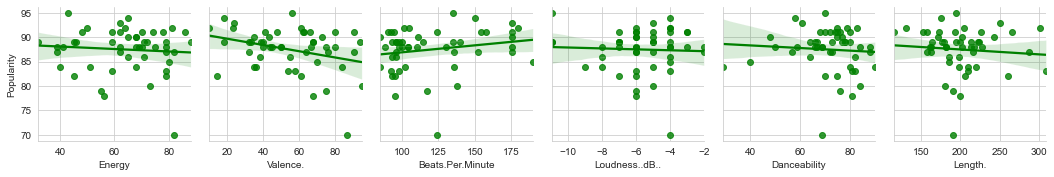

In [29]:
x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre','Liveness','Acousticness..',
                              'Speechiness.','Popularity']))
g = sns.PairGrid(data, y_vars=["Popularity"], x_vars=x_axis)
g.map(sns.regplot,color='g')
plt.savefig('C:\\Users\\Mario\\Downloads\\spotify popular 2019\\graph\\GraphCorelatedVIF.png',dpi=300)

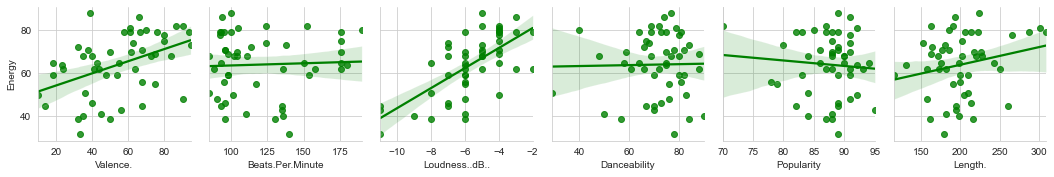

In [30]:
x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre','Liveness','Acousticness..',
                              'Speechiness.','Energy']))
g = sns.PairGrid(data, y_vars=["Energy"], x_vars=x_axis)
g.map(sns.regplot,color='g')
plt.savefig('C:\\Users\\Mario\\Downloads\\spotify popular 2019\\graph\\GraphCorelatedVIFenergy.png',dpi=300)

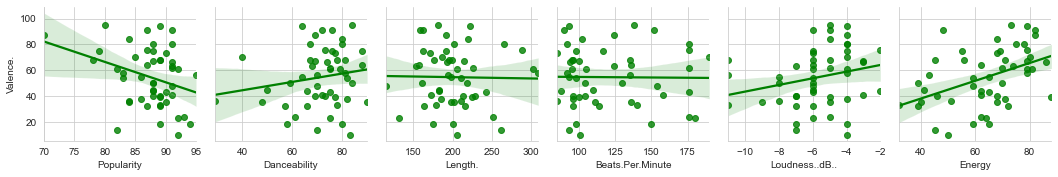

In [10]:
x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre','Liveness','Acousticness..',
                              'Speechiness.','Valence.']))
g = sns.PairGrid(data, y_vars=["Valence."], x_vars=x_axis)
g.map(sns.regplot,color='g')
plt.savefig('C:\\Users\\Mario\\Downloads\\spotify popular 2019\\graph\\GraphCorelatedVIFvalence.png',dpi=300)

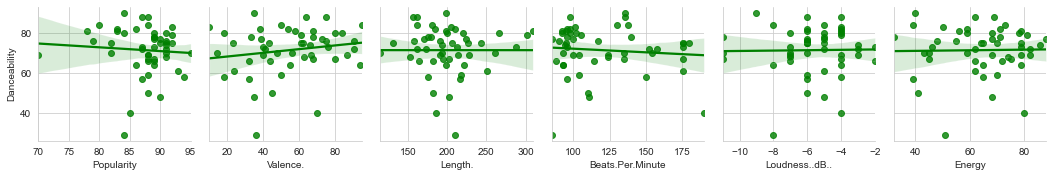

In [11]:
x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre','Liveness','Acousticness..',
                              'Speechiness.','Danceability']))
g = sns.PairGrid(data, y_vars=["Danceability"], x_vars=x_axis)
g.map(sns.regplot,color='g')
plt.savefig('C:\\Users\\Mario\\Downloads\\spotify popular 2019\\graph\\GraphCorelatedVIFDanceability.png',dpi=300)

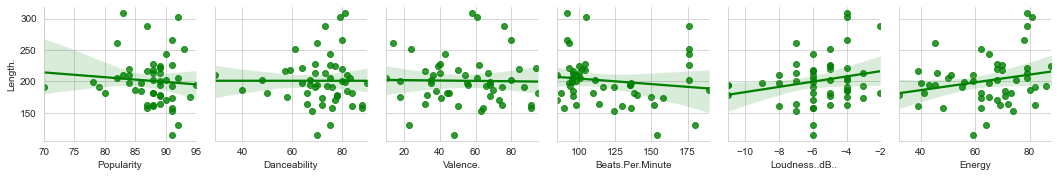

In [12]:
x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre','Liveness','Acousticness..',
                              'Speechiness.','Length.']))
g = sns.PairGrid(data, y_vars=["Length."], x_vars=x_axis)
g.map(sns.regplot,color='g')
plt.savefig('C:\\Users\\Mario\\Downloads\\spotify popular 2019\\graph\\GraphCorelatedVIFLength.png',dpi=300)

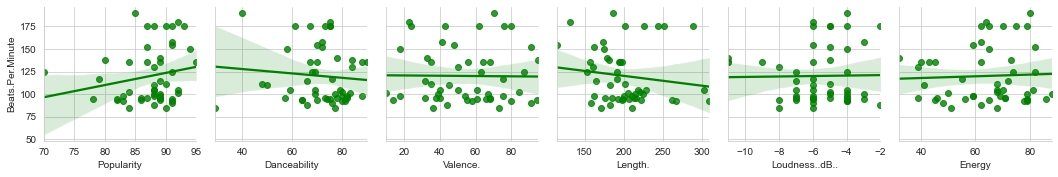

In [13]:
x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre','Liveness','Acousticness..',
                              'Speechiness.','Beats.Per.Minute']))
g = sns.PairGrid(data, y_vars=["Beats.Per.Minute"], x_vars=x_axis)
g.map(sns.regplot,color='g')
plt.savefig('C:\\Users\\Mario\\Downloads\\spotify popular 2019\\graph\\GraphCorelatedVIFBeatsPerMinute.png',dpi=300)

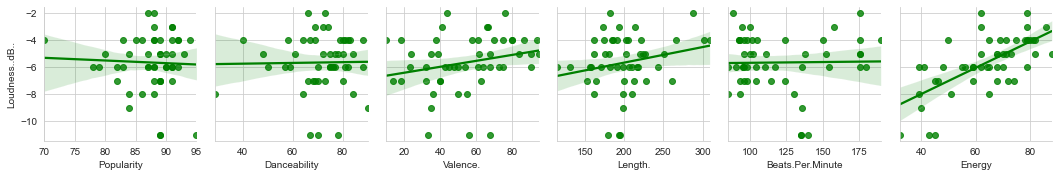

In [14]:
x_axis = list(data.columns)
x_axis = list(set(x_axis)-set(['Track.Name','Artist.Name','Genre','Liveness','Acousticness..',
                              'Speechiness.','Loudness..dB..']))
g = sns.PairGrid(data, y_vars=["Loudness..dB.."], x_vars=x_axis)
g.map(sns.regplot,color='g')
plt.savefig('C:\\Users\\Mario\\Downloads\\spotify popular 2019\\graph\\GraphCorelatedVIFLoudnessdB.png',dpi=300)

# Opini Pribadi

Di part ini gua gabisa jamin kalo hasil analisis gua itu bener-bener akurat dikarenakan gua sendiri masih belajar. Tolong buat masukannya karena gua butuh banget masukan kalo misalkan analisis gua ada yang salah.
    
Pada cek koefisien korelasi menggunakan r^2, data di setiap kolom dibandingkan dengan kolom lainnya, dan terlihat bahwa hasilnya negatif yang artinya model yang dibandingkan tidak mengikuti tren kolom lain. tetapi pada saat menampilkan graph terlihat bahwa perbandingan antara loudness dan energy mempunyai tren, yang mana semakin tinggi nilai energy semakin tinggi juga nilai loudness. tetapi pada nilai r^2 menunjukan hasil negatif yang menunjukan model data ngga fit antara loudness sama energy. Jadi saya sendiri tidak yakin bahwa pemaknaan yang tentang r^2 benar atau mungkin memang niai r^2nya benar dan saya yang kurang bisa memaknai nilai tersebut.

# Desc

''Beats Per Minute (BPM) - The tempo of the song.''
''Energy - The energy of a song - the higher the value, the more energtic. song''
''Danceability - The higher the value, the easier it is to dance to this song.''
''Loudness - The higher the value, the louder the song.''
''Valence - The higher the value, the more positive mood for the song.''
''Length - The duration of the song.''
''Acoustic - The higher the value the more acoustic the song is.''
''Popularity - The higher the value the more popular the song is.''
''Rnd - A randon number. Sort by this column to shuffle your playlist.''